In [13]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
import json

# JSON 파일 로드
with open(r"C:\Users\hi020\Desktop\play\sample_train1\annotations.json") as f:
    data = json.load(f)

data_dict = {}

# 데이터 처리
for num in range(800, 599): # num: 400~599
    bbox_list = []
    
    def yxwh(x, bbox_list):
        if x:
            if isinstance(x, list):
                for _x in x:
                    if isinstance(_x, dict):
                        for i in _x.keys():
                            if i == 'bboxes':
                                bbox_list += _x[i]
                            elif i == 'bbox':
                                bbox_list.append(_x[i])
                            else:
                                yxwh(_x[i], bbox_list)
            elif isinstance(x, dict):
                for i in x.keys():
                    if i == 'bboxes':
                        bbox_list += x[i]
                    elif i == 'bbox':
                        if list(x[i].keys()) == ['bbox']:
                            bbox_list.append(x[i]['bbox'])
                        else:
                            bbox_list.append(x[i])
                    else:
                        yxwh(x[i], bbox_list)

    def remove_duplicates(d): # 중복 제거
        x = []
        new_x = []
        for i in d:
            if i not in x:
                x.append(i)
            else:
                if i not in new_x:
                    new_x.append(i)
        return new_x

    y_axis_data = []
    y_label_data = []
    x_axis_data = []
    x_label_data = []
    all_points = []  # 라인별로 저장하기 위함

    fig_type = data[num].get('type', 'unknown')

    for model in data[num]['models']:
        points = []  # 각 모델에 대한 points 초기화
        yxwh(model, bbox_list)  # 각 모델에 대해 bbox_list에 추가
        y_val = model['y']  # y 값 업데이트

        for i in bbox_list:
            y = i['y']
            x = i['x']
            w = i['w']
            h = i['h']

            point1 = (x, y)
            point2 = (x + w, y + h)

            if len(y_val) >= 2:
                is_up = y_val[1] > y_val[0]
                if is_up:
                    point3 = (x, y + h)
                else:
                    point3 = (x, y)
                y_val = y_val[1:]
            else:
                point3 = (x, y + h) if is_up else (x, y)

            points.append(point3)

        if is_up:
            point3 = (x + w, y)
        else:
            point3 = (x + w, y + h)
        points.append(point3)

        all_points.append(points)  # 수정: 각 모델의 points를 all_points에 추가
        bbox_list = []  # 다음 모델을 위해 bbox_list 초기화

    # ticks
    y_bboxes_data = data[num]['general_figure_info']['y_axis']['major_ticks']['bboxes']
    y_bboxes_data = remove_duplicates(y_bboxes_data)
    for bbox in y_bboxes_data:
        y_axis_data.append({
            'x': bbox['x'],
            'y': bbox['y'],
            'w': bbox['w'],
            'h': bbox['h']
        })

    x_bboxes_data = data[num]['general_figure_info']['x_axis']['major_ticks']['bboxes']
    x_bboxes_data = remove_duplicates(x_bboxes_data)
    for bbox in x_bboxes_data:
        x_axis_data.append({
            'x': bbox['x'],
            'y': bbox['y'],
            'w': bbox['w'],
            'h': bbox['h']
        })

    # label
    y_bboxes_data = data[num]['general_figure_info']['y_axis']['major_labels']['bboxes']
    y_bboxes_data = remove_duplicates(y_bboxes_data)
    for bbox in y_bboxes_data:
        y_label_data.append({
            'x': bbox['x'],
            'y': bbox['y'],
            'w': bbox['w'],
            'h': bbox['h']
        })

    x_bboxes_data = data[num]['general_figure_info']['x_axis']['major_labels']['bboxes']
    x_bboxes_data = remove_duplicates(x_bboxes_data)
    for bbox in x_bboxes_data:
        x_label_data.append({
            'x': bbox['x'],
            'y': bbox['y'],
            'w': bbox['w'],
            'h': bbox['h']
        })

    # data_dict에 저장
    data_dict[num] = {
        'type': fig_type,
        'points': all_points,
        'x_axis': x_axis_data,
        'x_label': x_label_data,
        'y_axis': y_axis_data,
        'y_label': y_label_data
    }

# 데이터 출력
for num, data in data_dict.items():
    print(f"num: {num}, data: {data}")


num: 400, data: {'type': 'line', 'points': [[(69, 46), (99, 66), (129, 86), (159, 107), (190, 127), (220, 147), (250, 168), (280, 188), (310, 209), (341, 229), (371, 249), (401, 270), (431, 290), (461, 310)], [(69, 46), (99, 66), (129, 86), (159, 107), (190, 127), (220, 148), (250, 168), (280, 189), (310, 209), (341, 230), (371, 250), (401, 271), (431, 291), (461, 312)], [(69, 46), (99, 53), (129, 61), (159, 68), (190, 76), (220, 83), (250, 91), (280, 99), (310, 106), (341, 114), (371, 121), (401, 129), (431, 137), (461, 144)], [(69, 215), (99, 202), (129, 196), (159, 196), (190, 202), (220, 213), (250, 231), (280, 254), (310, 284), (341, 319), (371, 336), (401, 336), (431, 336), (461, 336)], [(69, 50), (99, 46), (129, 66), (159, 73), (190, 72), (220, 55), (250, 67), (280, 85), (310, 80), (341, 92), (371, 75), (401, 98), (431, 112), (461, 99)], [(69, 208), (99, 208), (129, 208), (159, 208), (190, 209), (220, 209), (250, 209), (280, 210), (310, 210), (341, 211), (371, 212), (401, 213), 

In [15]:
import json

# JSON 파일 로드
with open(r"C:\Users\hi020\Desktop\play\sample_train1\annotations.json") as f:
    data = json.load(f)

data[num]['general_figure_info']['y_axis']['major_labels']['bboxes']

[{'y': 341, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 280, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 220, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 159, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 99, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 39, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 341, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 280, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 220, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 159, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 99, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 39, 'x': 24, 'w': 13.96875, 'h': 14}]

In [16]:
data[num]['general_figure_info']['y_axis']['major_labels']['bboxes']

[{'y': 341, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 280, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 220, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 159, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 99, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 39, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 341, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 280, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 220, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 159, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 99, 'x': 24, 'w': 13.96875, 'h': 14},
 {'y': 39, 'x': 24, 'w': 13.96875, 'h': 14}]

In [17]:
len(data[num]['models'])

6

In [18]:
output_file = r"C:\Users\hi020\Desktop\play\sample_train1\data_output.json"
with open(output_file, 'w') as f:
    json.dump(data_dict, f, indent=4)

print(f"Data has been successfully saved to {output_file}")

Data has been successfully saved to C:\Users\hi020\Desktop\play\sample_train1\data_output.json


In [19]:
#재확인작업

In [20]:
with open(r"C:\Users\hi020\Desktop\play\sample_train1\annotations.json") as f:
    data = json.load(f)
num =2
data[num]['general_figure_info']['x_axis']['major_ticks']['bboxes']

[{'y': 268, 'x': 134, 'w': 8, 'h': 8},
 {'y': 268, 'x': 296, 'w': 8, 'h': 8},
 {'y': 268, 'x': 458, 'w': 8, 'h': 8},
 {'y': 268, 'x': 134, 'w': 8, 'h': 8},
 {'y': 268, 'x': 296, 'w': 8, 'h': 8},
 {'y': 268, 'x': 458, 'w': 8, 'h': 8}]

In [21]:
a = data[num]['general_figure_info']['y_axis']['major_ticks']['bboxes']

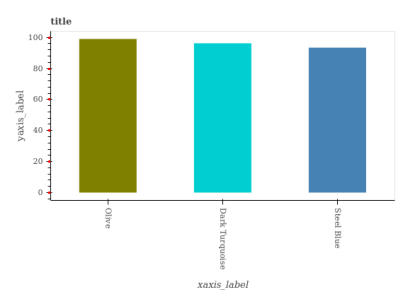

In [22]:
from matplotlib.patches import Circle

img_lo = r"C:\Users\hi020\Desktop\play\sample_train1\png\{}.png".format(num)

fig, ax = plt.subplots(1, figsize=(5,5))
ax.set_axis_off()
ax.imshow(plt.imread(img_lo))

for i in a:
    #circle1 = Circle(((i['x']+,i['y'])), radius=0.5, color='red')
    #ax.add_patch(circle1)
    
    # 우측 상단 점을 원으로 표시합니다.
    circle2 = Circle((i['x'] + i['w']/2, i['y'] + i['h']/2), radius=0.5, color='red')
    ax.add_patch(circle2)
    
plt.show()
